## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import os
import sys
import datetime

# DATA COLLECTION

### Read Excel input data

In [2]:
df = pd.read_excel(r'data/Data_Train.xlsx')

In [3]:
# Head
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Tail
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
# Describe
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data = df

# DATA CLEANING

#### # Find the missing value rows; Taken with respect to Route.

In [7]:
# Find the missing value rows; Taken with respect to Route.
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


### Remove Missing value in Route and Total_Stops

In [8]:
# Remove Missing value in Route and Total_Stops
train_data.dropna(inplace=True)

In [9]:
# Get memory usage of data
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


### Convert Datatype to Datetime for Date, Arrival and Departure Time

In [10]:
train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)

C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\3674048387.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\3674048387.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']] = train_data[['Date_of_Journey', 'Dep_Time', 'Arrival_Time']].apply(pd.to_datetime)
C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\3674048387.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

### Add three columns detailing the Journey Data

In [11]:
# Add three columns detailing the Journey Data
train_data['Journey_Year'] = train_data['Date_of_Journey'].dt.year
train_data['Journey_Month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_Day'] = train_data['Date_of_Journey'].dt.day

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
 11  Journey_Year     10682 non-null  int32         
 12  Journey_Month    10682 non-null  int32         
 13  Journey_Day      10682 non-null  int32         
dtypes: datetime64[ns](3), int32(3), int64(1), o

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-07-04 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-07-04 05:50:00,2024-07-04 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2024-07-04 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2024-07-04 18:05:00,2024-07-04 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2024-07-04 16:50:00,2024-07-04 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


### Extract Derived Attributes

In [14]:
# Function to get hour and mins for Departure and Arrival time
def ExtractHoursAndMins(dataframe, col):
    dataframe[col+"_hour"] = dataframe[col].dt.hour
    dataframe[col+"_mins"] = dataframe[col].dt.minute

In [15]:
ExtractHoursAndMins(train_data,"Dep_Time")
ExtractHoursAndMins(train_data,"Arrival_Time")


#### Drop columns which are not necessary

In [16]:
col_delete = ['Dep_Time','Arrival_Time']
train_data.drop(col_delete, axis=1, inplace=True)

### Duration Column Rephrase 

In [17]:
def DurationRephrase(x):
    if 'h' not in x:
        return '0h' + ' ' + x
    elif 'm' not in x:
        return x + ' ' + '0m'
    else:
        return x

In [18]:
train_data_copy = train_data

In [19]:
#train_data = train_data_copy
train_data['Duration'] = train_data['Duration'].apply(DurationRephrase)
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,2019,6,24,9,0,11,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,2019,3,12,18,55,10,25
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,2019,3,1,8,0,5,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,2019,3,12,8,55,10,25
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,2019,5,27,11,25,19,15


### Add Duration Hours and Minutes column

In [20]:
train_data['Duration_Hours'] = train_data['Duration'].apply(lambda x:x.split()[0][:-1])
train_data['Duration_Minutes'] = train_data['Duration'].apply(lambda x:x.split()[1][:-1])
train_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30,5,25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35,4,45
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,2019,6,24,9,0,11,25,2,25
6,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,2019,3,12,18,55,10,25,15,30
7,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,2019,3,1,8,0,5,5,21,5
8,Jet Airways,2019-03-12,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,2019,3,12,8,55,10,25,25,30
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,2019,5,27,11,25,19,15,7,50


### Column for Total Duration in Mins only

In [21]:
train_data['Duration_Hours'] = train_data['Duration_Hours'].astype(int)
train_data['Duration_Minutes'] = train_data['Duration_Minutes'].astype(int)

In [22]:
train_data['Duration_Total_Minutes'] = train_data['Duration_Hours']*60 + train_data['Duration_Minutes']

# DATA ANALYSIS

### Analysis - When does most of the flight take off?

In [23]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes,Duration_Total_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30,5,25,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35,4,45,285


In [24]:
def GetTimeCategory(val):
    if val>4 and val<8:
        return 'Early_Morning'
    elif val>8 and val<12:
        return 'Morning'
    elif val>12 and val<16:
        return 'Afternoon'
    elif val>16 and val<20:
        return 'Evening'
    elif val>20 and val<24:
        return 'Night'
    else:
        return 'Late_Night'

<Axes: xlabel='Dep_Time_hour'>

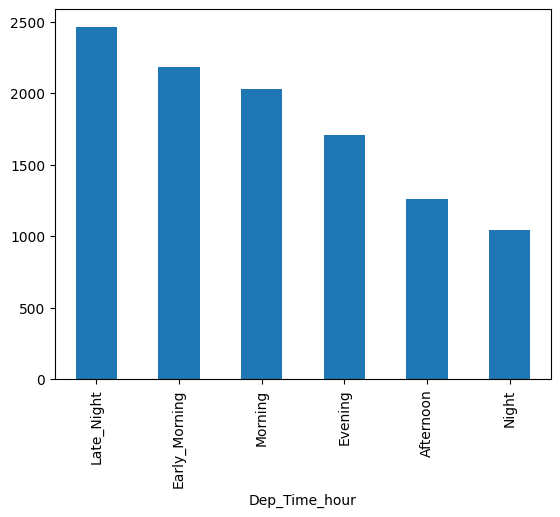

In [25]:
train_data['Dep_Time_hour'].apply(GetTimeCategory).value_counts().plot(kind='bar')

#### We can infer that most number of flights depart at Late Night or Early Morning

### Analysis - Does Duration and Stops have an impact on Price?

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

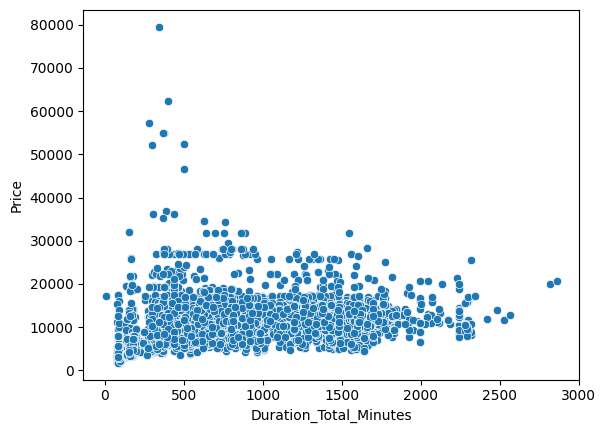

In [26]:
sns.scatterplot(x='Duration_Total_Minutes',y='Price',data=train_data)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

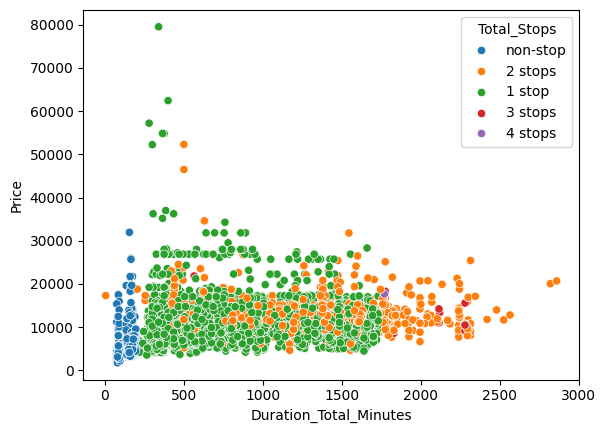

In [27]:
sns.scatterplot(x='Duration_Total_Minutes',y='Price',data=train_data,hue='Total_Stops')

#### Regression Plot

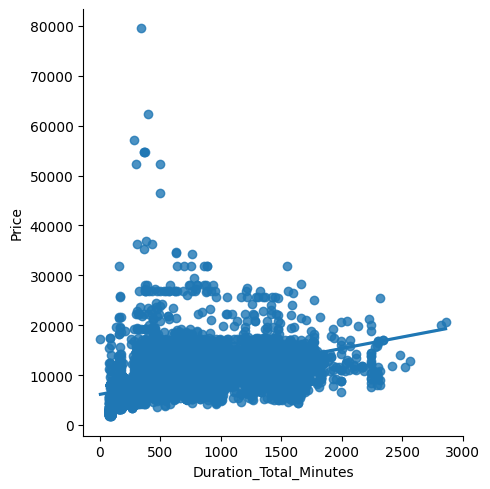

In [28]:
sns.lmplot(x='Duration_Total_Minutes',y='Price',data=train_data)

#### Slope is almost 0.6. So we can infer that with a increase of 100mins duration, price increase can be 60units

### Analysis - In which route Jet Airways is extremely used?

In [29]:
train_data[train_data['Airline'] == 'Jet Airways']['Route'].value_counts()

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
Name: count, dtype: int64

### Analysis - Price variation among Airlines
#### This is done by using Box plots - It gives whiskers(lowest and highest points), 25% value, 50% value(median), 75% value. So between 25 and 75, 50% of the datapoints lie.

C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\2929317608.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Airline', y='Price', data=train_data,palette='Set2')


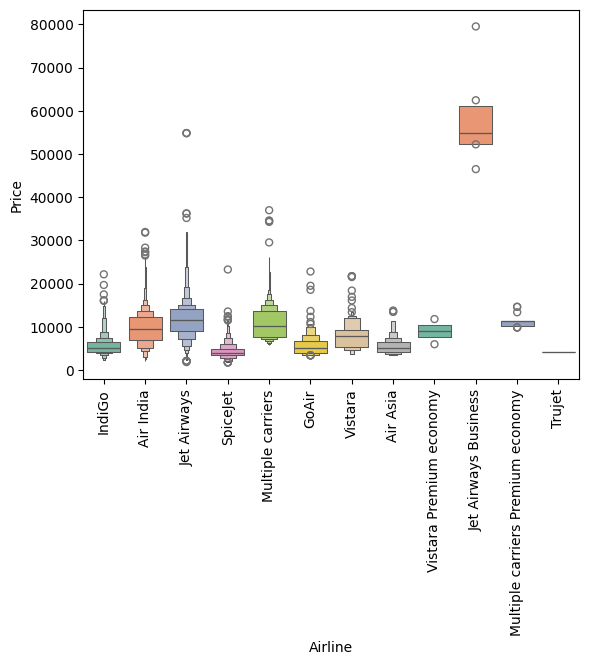

In [30]:
sns.boxenplot(x='Airline', y='Price', data=train_data,palette='Set2')
plt.xticks(rotation=90)
plt.show()

# FEATURE ENGINEERING
#### Since ML Alogrithms only understands numbers and vectors. We have to convert our Categorical features to Numerical features. One method of Feature engineering is FEATURE ENCODING
#### Nominal Data - Data which doesn't have any order. Here in this coloumns like source and destination doesn't have any order. 
#### Ordinal Data - Data which follows some kind of order. Here column like Stops follows an order like zero, 1, 2 etc.
#### Rule of Thumb - For Nominal data - ONE-HOT-ENCODING method is used for Feature Encoding
#### For Ordinal Data - LABEL ENCODING method is used
#### If we add more and more features for ML, it creates an overhead in memory and is called as 'CURSE OF DIMENTIONALITY'

In [31]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes,Duration_Total_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25,445


In [32]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

#### Find Categorical and Numerical Features in the data.

In [33]:
# Categorical Features
category_feature_list = [ col for col in train_data.columns if train_data[col].dtype == 'object' ]
category_feature_list

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [34]:
# Numerical Features
numerical_feature_list = [ col for col in train_data.columns if train_data[col].dtype != 'object' ]
numerical_feature_list

['Date_of_Journey',
 'Price',
 'Journey_Year',
 'Journey_Month',
 'Journey_Day',
 'Dep_Time_hour',
 'Dep_Time_mins',
 'Arrival_Time_hour',
 'Arrival_Time_mins',
 'Duration_Hours',
 'Duration_Minutes',
 'Duration_Total_Minutes']

In [35]:
for sub_category in train_data['Source'].unique():
    train_data['Source'+'_'+sub_category] = train_data['Source'].apply(lambda x:1 if x==sub_category else 0)

### NOTE:: Target guided encoding is done to prevent overhead. 
#### TARGET GUIDING ENCODING - It means encoding of some features like 'Airlines' is done based on the target feature(Here 'Price'). Average price of airline in calculated. Then whichever airline has the highest value, that particular Airline is given highest importance.

#### Target Guiding Encoding for AIRLINES

In [36]:
airline_average_price_sort = train_data.groupby('Airline')['Price'].mean().sort_values().index
price_importance = {val:index for index,val in enumerate(airline_average_price_sort,0)}
price_importance 

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [37]:
## Map function in Python = map(function, iterable)
## square function = x*x, then iterable is a list; After applying map function, new output will be a list of square of numbers passed
train_data['Airline'] = train_data['Airline'].map(price_importance)

#### Target Guiding Encoding for DESTINATION

In [38]:
# Replace 'New Delhi' to Delhi
train_data['Destination'].replace('New Delhi', 'Delhi', inplace=True)
train_data['Destination'].unique()

C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\2286522502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Destination'].replace('New Delhi', 'Delhi', inplace=True)


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [39]:
airline_destination_price_sort = train_data.groupby('Destination')['Price'].mean().sort_values().index
price_importance = {val:index for index,val in enumerate(airline_destination_price_sort,0)}
price_importance 

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [40]:
train_data['Destination'] = train_data['Destination'].map(price_importance)

#### Manual Encoding for STOPS - This is an ordinal data
#### Dictionary is created and this is mapped to the stops data

In [41]:
dict_stop_data = {"non-stop": 0,
                 "1 stop": 1,
                 "2 stops": 2,
                 '3 stops': 3,
                 '4 stops': 4}

In [42]:
train_data['Total_Stops'] = train_data['Total_Stops'].map(dict_stop_data)

#### Remove Unwanted features

In [43]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Year',
       'Journey_Month', 'Journey_Day', 'Dep_Time_hour', 'Dep_Time_mins',
       'Arrival_Time_hour', 'Arrival_Time_mins', 'Duration_Hours',
       'Duration_Minutes', 'Duration_Total_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [44]:
train_data.drop(columns=['Date_of_Journey', 'Route','Duration', 'Total_Stops'], inplace=True)

In [45]:
train_data.head(4)

,Airline,Source,Destination,Additional_Info,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,No info,3897,2019,3,24,22,20,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,No info,7662,2019,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,Delhi,4,No info,13882,2019,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,Kolkata,3,No info,6218,2019,5,12,18,5,23,30,5,25,325,0,1,0,0,0


In [46]:
train_data.drop(columns=['Additional_Info', 'Source'], inplace=True)

In [47]:
train_data.head(4)

,Airline,Destination,Price,Journey_Year,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,3897,2019,3,24,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7662,2019,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,13882,2019,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,6218,2019,5,12,18,5,23,30,5,25,325,0,1,0,0,0


In [48]:
train_data.drop(columns=['Journey_Year'], inplace=True)

In [49]:
train_data.head(4)


,Airline,Destination,Price,Journey_Month,Journey_Day,Dep_Time_hour,Dep_Time_mins,Arrival_Time_hour,Arrival_Time_mins,Duration_Hours,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,3897,3,24,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7662,5,1,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,13882,6,9,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,6218,5,12,18,5,23,30,5,25,325,0,1,0,0,0


#### Detection of Outliers 
#### These are extremely high or low values which can bring instability in ML Algorithms.This can be detected by data analysis plots like BOX, HISTOGRAM or DISTRIBUTION PLOTS.
#### In the Distribution plot, If there is skewness on the right or there is long tail on the right side. Then this data has High Positive Outliers.

In [50]:
def plot(data,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2, orient='h')
    sns.histplot(data[col],ax=ax3, kde=False)

C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\3178759021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


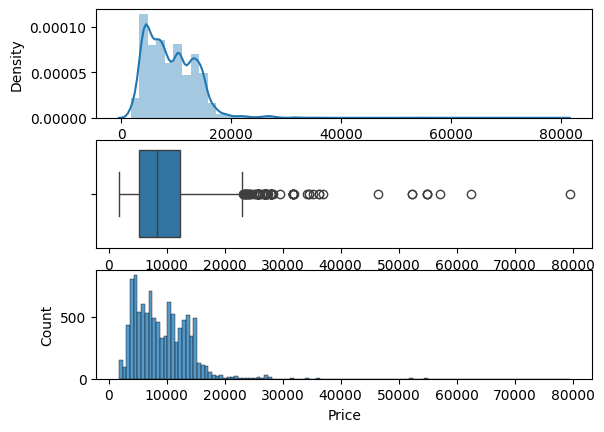

In [51]:
plot(train_data,'Price')

#### The range of a box plot in Seaborn (and generally in statistical plotting) is determined by several key components which include the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. Additionally, box plots often indicate outliers. Here’s a breakdown of how these components are determined:
#### Median (Q2): This is the middle value of the dataset when it is ordered from least to greatest. It divides the dataset into two equal halves.
#### First Quartile (Q1): This is the median of the first half of the dataset (the lower 25%). It represents the 25th percentile.
#### Third Quartile (Q3): This is the median of the second half of the dataset (the upper 25%). It represents the 75th percentile.
#### Interquartile Range (IQR): This is the range between the first and third quartiles, calculated as 
#### IQR=Q3−Q1. The IQR represents the middle 50% of the data.
#### Whiskers: The whiskers of the box plot typically extend to 1.5 times the IQR from the quartiles. Specifically:
#### The lower whisker extends from Q1 to the smallest data point within Q1−1.5×IQR.
#### The upper whisker extends from Q3 to the largest data point within Q3+1.5×IQR.
#### Outliers: Any data points outside the range of the whiskers are considered outliers and are often plotted as individual points.


#### Interquartile Logic is used here
#### Outliers are replaced by median in the dataset. Mean is not used because the outlier value affects the mean value. 

In [52]:
q1 = train_data['Price'].quantile(0.25)
q3 = train_data['Price'].quantile(0.75)
IQR = q3-q1
lower_whisker = q1-1.5*IQR
upper_whisker = q3+1.5*IQR


In [53]:
# Find the outlier values
data = [ price for price in train_data['Price'] if price > upper_whisker or price < lower_whisker ]
print(data)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [54]:
train_data_copy = train_data.copy()

In [55]:
train_data['Price'] = train_data['Price'].apply(lambda x:x if x<35000 else train_data['Price'].median())

C:\Users\aswinp\AppData\Local\Temp\ipykernel_17908\3178759021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col],ax=ax1)


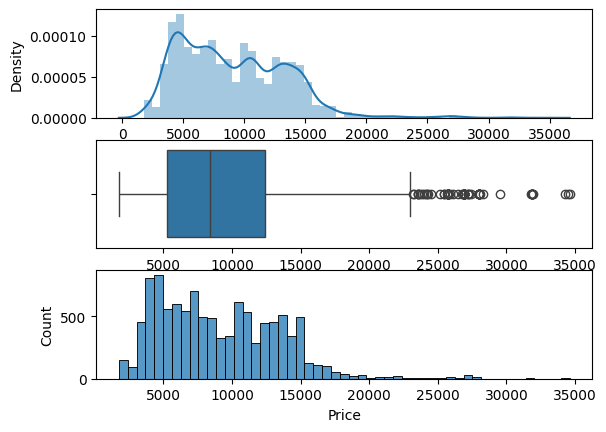

In [56]:
plot(train_data,'Price')

#### Dependent Features/ Target variable in which all other features can make a change on.

In [57]:
y = train_data['Price']

In [58]:
X = train_data.drop('Price', axis=1)

#### Find the coorelation of independent variables wrt target variable

In [59]:
from sklearn.feature_selection import mutual_info_regression

In [60]:
mutual_info_regression(X, y)

array([1.32899146, 1.05751794, 0.62939921, 0.37415274, 0.93671717,
       0.75831644, 1.13786189, 0.89621761, 1.12608229, 0.67447087,
       1.77451889, 0.38386933, 0.44780546, 0.51694327, 0.13779949,
       0.19966583])

In [61]:
mutual_df = pd.DataFrame(mutual_info_regression(X, y), index=X.columns)

In [63]:
mutual_df.columns = ['importance']

#### Mutual information is the metric to find the relation between features. If two features has MUTUAL INFORMATION = 0 , then they are independent. If value is 1, then they are highly dependent

In [64]:
mutual_df

,importance
Airline,1.322989
Destination,1.058513
Journey_Month,0.621280
Journey_Day,0.373356
Dep_Time_hour,0.929321
Dep_Time_mins,0.749113
Arrival_Time_hour,1.139177
Arrival_Time_mins,0.886487
Duration_Hours,1.120922
Duration_Minutes,0.682363


In [67]:
mutual_df.sort_values(by='importance', ascending=False)

,importance
Duration_Total_Minutes,1.778339
Airline,1.322989
Arrival_Time_hour,1.139177
Duration_Hours,1.120922
Destination,1.058513
Dep_Time_hour,0.929321
Arrival_Time_mins,0.886487
Dep_Time_mins,0.749113
Duration_Minutes,0.682363
Journey_Month,0.621280


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
from sklearn.ensemble import RandomForestRegressor

# ML Modelling

In [76]:
ml_model = RandomForestRegressor()

In [79]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [80]:
y_pred = ml_model.predict(X_test)

In [81]:
from sklearn import metrics

In [82]:
metrics.r2_score(y_test,y_pred)

0.8066685063655029

#### Save the Model in a pickle file

In [83]:
import pickle

In [84]:
file = open('rf_perform.pkl', 'wb')

In [85]:
pickle.dump(ml_model, file)

In [86]:
file2 = open('rf_perform.pkl', 'rb')

In [87]:
ml_model_new = pickle.load(file2)

In [89]:
y_pred2 = ml_model_new.predict(X_test)

In [90]:
metrics.r2_score(y_test,y_pred2)

0.8066685063655029

### Evaluation of ML Model

#### Here Mean Absolute Percentage Error is calculated

In [91]:
def Mape(y_true, y_pred):
    arr_y_true, arr_y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((arr_y_true - arr_y_pred)/arr_y_true))*100

In [93]:
Mape(y_test, y_pred)

13.665870774071976

#### Automate ML Model

In [100]:
def Prediction(ml_model):
    # Train score;
    model = ml_model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)

    # Prediction;
    y_prediction = model.predict(X_test)
    r2_score = metrics.r2_score(y_test,y_prediction)
    mae = metrics.mean_absolute_error(y_test,y_prediction)
    mse = metrics.mean_squared_error(y_test,y_prediction)
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_prediction))
    mape = Mape(y_test,y_prediction)

    # Table of results;
    print(f"Training score : {train_score}")
    print(f"R2 score : {r2_score}")
    print(f"mae : {mae}")
    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"mape : {mape}")

    # Graph
    sns.displot(y_test - y_prediction)

Training score : 0.9488901032502782
R2 score : 0.8057979761321982
mae : 1225.6308686142054
mse : 3780647.2548746755
rmse : 1944.3886583897458
mape : 13.74384407587857


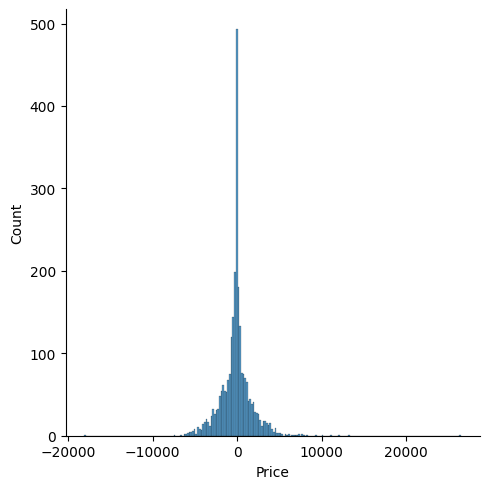

In [101]:
Prediction(RandomForestRegressor())